In [1]:
import numpy as np
import pygfx as gfx
import sleap_io as sio
from wgpu.gui.auto import WgpuCanvas

In [2]:
labels = sio.load_slp("tests/data/slp/centered_pair_predictions.slp")
frame_index = input(f"Enter the index of the frame you want to visualize (range: {0} - {len(labels)-1}): ")
instances = labels.labeled_frames[int(frame_index)].instances
video = labels.videos[0]
image_height, image_width = video.shape[1], video.shape[2]

No accelerated colorspace conversion found from yuv420p to bgr24.


RFBOutputContext()

JupyterWgpuCanvas()
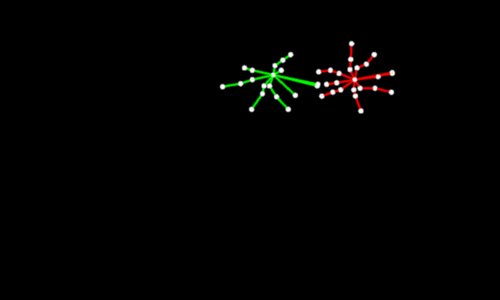

In [28]:
canvas = WgpuCanvas()
renderer = gfx.WgpuRenderer(canvas)
scene = gfx.Scene()
colors = [(255, 0, 0, 1.0), (0, 255, 0, 1.0), (0, 0, 255, 1.0), (255, 255, 0, 1.0), (0, 255, 255, 1.0), (255, 0, 255, 1.0)]
for i, instance in enumerate(instances):
    instance_np = instance.numpy()
    instance_np -= 100
    positions = np.hstack((instance_np, np.ones((instance_np.shape[0], 1)))).astype(np.float32)
    points = gfx.Points(
        gfx.Geometry(positions=positions),
        gfx.PointsMaterial(size=4, color=(255, 255, 255, 1.0)),
    )
    scene.add(points)
    for index1, index2 in instance.skeleton.edge_inds:
        edge = instance_np[[index1, index2]]
        edge = np.hstack((edge, np.ones((edge.shape[0], 1)))).astype(np.float32)
        scene.add(gfx.Line(
            gfx.Geometry(positions=edge),
            gfx.LineMaterial(color=colors[i], thickness=1.0),
        ))

scene.add(gfx.Background(material=gfx.BackgroundMaterial("#000000")))

camera = gfx.OrthographicCamera(image_width, image_height)
canvas.request_draw(lambda: renderer.render(scene, camera))
canvas